### Ejercicio 1

La base de datos **MNIST** contiene imágenes de 28×28, en escala de grises, de números escritos a mano.  
Está conformada por **60.000 ejemplos de entrenamiento** y **10.000 ejemplos de prueba**.

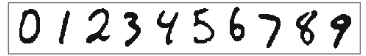

Para cargar las imágenes utilice:

```python
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
```

Puede visualizar una imagen utilizando:

```py
nImg = 0  # nro. de imagen a visualizar
plt.imshow(X_train[0, :, :], cmap='gray')
```
## a)

Con el conjunto de 60.000 imágenes, entrene una red neuronal convolucional (CNN) para predecir el dígito presente en la imagen.
Recuerde normalizar los valores de cada imagen.
Salve el modelo para recuperarlo después.

## b)

Levante el modelo guardado en el punto anterior y utilice la clase DrawPanel del módulo utils.images 
de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.

In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
# Cargar y normalizar el conjunto de datos MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))
IMG_SHAPE = X_train[0].shape
TARGET_CNT= len(Y_train[0])

print("Cantidad de imágenes de entrenamiento:", len(X_train))
print("Cantidad de imágenes de prueba:", len(X_test))
print("Forma de una imagen:", IMG_SHAPE)
print("Cantidad de clases objetivo:", TARGET_CNT)

X_train = X_train / 255
X_test  = X_test  / 255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

Cantidad de imágenes de entrenamiento: 60000
Cantidad de imágenes de prueba: 10000
Forma de una imagen: (28, 28)
Cantidad de clases objetivo: 10


In [6]:
# Entrentar red convulucional
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # Usamos esto porque las imágenes son en escala de grises
model.add(MaxPooling2D(pool_size=(2, 2))) # Reducimos la dimensionalidad para disminuir el costo computacional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # Segunda capa convolucional para extraer características más complejas
model.add(MaxPooling2D(pool_size=(2, 2)))    # Otra capa de pooling para seguir reduciendo la dimensionalidad
model.add(Flatten()) # Aplanamos las matrices 2D a un vector 1D para conectarlo a la capa densa
model.add(Dense(128, activation='relu')) # Capa densa con 128 neuronas y función de activación ReLU para introducir no linealidad
model.add(Dropout(0.5)) # Capa de dropout para prevenir el sobreajuste
model.add(Dense(TARGET_CNT, activation='softmax')) # Capa de salida con función de activación softmax para clasificación multiclase

# Terminar antes si la precisión de validación no mejora en 3 épocas consecutivas

cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[cb])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Precisión en el conjunto de prueba:', test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8966 - loss: 0.3368 - val_accuracy: 0.9759 - val_loss: 0.0806
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9659 - loss: 0.1148 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0837 - val_accuracy: 0.9862 - val_loss: 0.0495
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9786 - loss: 0.0713 - val_accuracy: 0.9865 - val_loss: 0.0486
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9826 - loss: 0.0584 - val_accuracy: 0.9881 - val_loss: 0.0409
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0520 - val_accuracy: 0.9891 - val_loss: 0.0397
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0449 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0427 - val_accuracy: 0.

In [10]:
# Levante el modelo guardado en el punto anterior y utilice la clase DrawPanel del módulo utils.images 
# de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.

import utils as img_utils
drawn_image = img_utils.DrawPanel(width=200, height=200)
drawn_image.show()
# Obtener la imagen dibujada, preprocesarla y hacer la predicción
image = drawn_image.get_image()
image = image.resize((28, 28)).convert('L')  # Redimensionar y convertir a escala de grises
image_array = np.array(image) / 255.0  # Normalizar
image_array = image_array.reshape(1, 28, 28, 1)  # Ajustar la forma para el modelo
prediction = model.predict(image_array)
predicted_class = np.argmax(prediction)
print("El dígito predicho es:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
El dígito predicho es: 8


# Ejercicio 2
Se buscará resolver la clasificación de los dígitos de MNIST usando la siguiente configuración:

```py
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(2,2))) # -- opcional --
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()
```

donde F es la cantidad de filtros o de mapas de características, K es el tamaño del kernel o máscara, S es el
valor del stride y FUN es la función de activación de la capa de convolución.
La tabla que aparece a continuación sugiere los valores a utilizar. Se recomienda emplear Parada
Temprana para reducir el tiempo de entrenamiento. Para ello utilice
```py
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)
```
Esto indica que, si el valor del accuracy sobre los datos de validación no mejora después de 5 épocas, el
entrenamiento finaliza. Puede usarse el parámetro min_delta para indicar cuando la diferencia entre dos
accuracy se considerará significativa. Luego agregue este objeto en el momento del entrenamiento por
medio del párametro callbacks
```py
H = model.fit(x = X_train, y = Y_train, batch_size = LOTES,
validation_data = (X_test, Y_test), epochs=4000, callbacks=[es])
```

| Cant. de filtros | Tamaño del kernel o filtro | Stride | Función de activación | Max Pooling con filtro de tamaño 2x2 y stride=2 | Total de parámetros | Épocas | Accuracy en Train | Accuracy en Test |
|------------------:|----------------------------|:-------:|-----------------------|:------------------------------------------------:|:--------------------:|:-------:|:-----------------:|:----------------:|
| 4                | 3x3                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 16               | 3x3                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 64               | 3x3                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 4                | 7x7                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 16               | 7x7                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 64               | 7x7                        | 1       | ReLU                  | Sí                                                |                      |         |                   |                  |
| 64               | 3x3                        | 2       | ReLU                  | No                                                |                      |         |                   |                  |
| 64               | 3x3                        | 3       | ReLU                  | No                                                |                      |         |                   |                  |
| 64               | 3x3                        | 1       | Tanh                  | Sí                                                |                      |         |                   |                  |
| 64               | 3x3                        | 1       | Sigmoide              | Sí                                                |                      |         |                   |                  |


In [9]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.activations import relu, sigmoid, softmax, tanh
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)

combos = [
    (4, 3, 1, relu),
    (16, 3, 1, relu),
    (64, 3, 1, relu),
    (4, 7, 1, relu),
    (16, 7, 1, relu),
    (64, 7, 1, relu),
    (64, 3, 2, relu),
    (64, 3, 3, relu),
    (64, 3, 1, tanh),
    (64, 3, 1, sigmoid),
]
for i in range(10):
    actual = combos[i]
    es = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)

    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(actual[0], kernel_size=actual[1], strides=(actual[2],actual[2]), activation=actual[3]))
    if actual[2] > 1:
        model.add(MaxPooling2D(pool_size=(2,2))) # -- opcional --
    model.add(Flatten())
    model.add(Dense(10,activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    LOTES = 128
    H = model.fit(x = X_train, y = Y_train, batch_size = LOTES,
                  validation_data=(X_test, Y_test), epochs=100, callbacks=[es], verbose=0)
    acc_train = model.evaluate(X_train, Y_train, verbose=0)[1]
    params = model.count_params()
    epocas = len(H.history['loss'])
    acc_test = model.evaluate(X_test, Y_test, verbose=0)[1]
    print(f"Modelo {i+1}: Parámetros={params}, Épocas={epocas}, Acc.Train={acc_train:.4f}, Acc.Test={acc_test:.4f}")


Modelo 1: Parámetros=27090, Épocas=18, Acc.Train=0.9868, Acc.Test=0.9732
Modelo 2: Parámetros=108330, Épocas=12, Acc.Train=0.9968, Acc.Test=0.9799
Modelo 3: Parámetros=433290, Épocas=9, Acc.Train=0.9977, Acc.Test=0.9817
Modelo 4: Parámetros=19570, Épocas=13, Acc.Train=0.9898, Acc.Test=0.9806
Modelo 5: Parámetros=78250, Épocas=8, Acc.Train=0.9943, Acc.Test=0.9857
Modelo 6: Parámetros=312970, Épocas=15, Acc.Train=0.9989, Acc.Test=0.9872
Modelo 7: Parámetros=23690, Épocas=17, Acc.Train=0.9888, Acc.Test=0.9813
Modelo 8: Parámetros=10890, Épocas=30, Acc.Train=0.9763, Acc.Test=0.9674
Modelo 9: Parámetros=433290, Épocas=7, Acc.Train=0.9327, Acc.Test=0.9231
Modelo 10: Parámetros=433290, Épocas=42, Acc.Train=0.9900, Acc.Test=0.9749


# Ejercicio 3
Para resolver este ejercicio utilice un modelo de red neuronal convolucional que reconozca la cantidad de
dedos extendidos en cada mano de las imágenes que conforman el juego de datos “Fingers”.

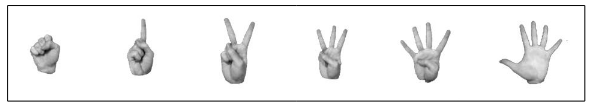

La versión original de este de estas imágenes se encuentra en https://www.kaggle.com/koryakinp/fingers.

Puede hallar una versión reducida de estas imágenes en el Moodle del curso, en la misma sección donde se
encuentra este enunciado de práctica. También encontrará allí ejemplos sobre cómo cargar estas imágenes
y cómo procesarlas con una red neuronal convolucional.

### a) Entrene y pruebe un modelo utilizando los datos de las carpetas test y train, midiendo accuracy

### b) Genere una versión del dataset para test agregando transformaciones al azar sobres imágenes originales. Haga rotaciones entre -45 y 45 grados, repita el test y mida el accuracy.

### c) Genere una versión del dataset train como la realizada en b) y repita entrenamiento y prueba de a) con los datasets de modificados.

In [28]:
# Cargo imagenes desde csv/Fingers/train con la libreria de imagenes de Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    'csv/Fingers/train',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)
test_generator = datagen.flow_from_directory(
    'csv/Fingers/test',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
es = EarlyStopping(
    monitor='val_loss',   
    mode='min',
    patience=3,          
    min_delta=1e-4,       
    restore_best_weights=True,
    verbose=1
)
# Entrenar el modelo
model.fit(train_generator, epochs=10, validation_data=test_generator, batch_size=32, callbacks=[es])

# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_generator)
print('Precisión en el conjunto de prueba de dedos:', test_acc)

Found 18000 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9278 - loss: 0.2818 - val_accuracy: 0.9889 - val_loss: 0.0417
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9959 - loss: 0.0230 - val_accuracy: 0.9953 - val_loss: 0.0204
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9996 - loss: 0.0065 - val_accuracy: 0.9994 - val_loss: 0.0056
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9999 - loss: 0.0030 - val_accuracy: 0.9986 - val_loss: 0.0046
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9999 - loss: 0.0018 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.9986 - val_loss: 0.0039
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 7.0702e-04 - val_accuracy: 0.9997 - val_loss: 0.0016
Epoch 8/

In [29]:
# Rotacion de imagenes en -45 y 45 grados
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=45)

# Imagenes de fingers
test_generator_rotated = datagen.flow_from_directory(
    'csv/Fingers/test',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Evaluar el modelo con imagenes rotadas
test_loss_rotated, test_acc_rotated = model.evaluate(test_generator_rotated)
print('Precisión en el conjunto de prueba de dedos con imágenes rotadas:', test_acc_rotated)

Found 3600 images belonging to 6 classes.
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6572 - loss: 1035.2740
Precisión en el conjunto de prueba de dedos con imágenes rotadas: 0.6572222113609314


In [30]:
# Train rotado
train_generator_rotated = datagen.flow_from_directory(
    'csv/Fingers/train',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)

# Reentrenar el modelo con imagenes rotadas (antes reseteamos los pesos)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_generator_rotated, epochs=10, validation_data=test_generator_rotated, batch_size=32, callbacks=[es])
# Evaluar el modelo reentrenado con imagenes rotadas
test_loss_rotated_retrained, test_acc_rotated_retrained = model.evaluate(test_generator_rotated)
print('Precisión en el conjunto de prueba de dedos con imágenes rotadas después de reentrenar:', test_acc_rotated_retrained)

Found 18000 images belonging to 6 classes.
Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8554 - loss: 3.6198 - val_accuracy: 0.9708 - val_loss: 0.0901
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9896 - loss: 0.0355 - val_accuracy: 0.9917 - val_loss: 0.0271
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9939 - loss: 0.0207 - val_accuracy: 0.9944 - val_loss: 0.0152
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9722 - loss: 0.0901
Precisión en el conjunto de prueba de dedos con imágenes rotadas después de reentrenar: 0.9722222089767456


# Ejercicio 4
Resuelva el punto c) del ejercicio anterior con las imágenes originales de las carpetas train y test y utilice:
### a) el objeto ImageDataGenerator del módulo tensorflow.keras.preprocessing.image para generar de forma automática una versión aumentada de los datos con las características del punto b). Utilice el método flow_from_file del objeto ImageDataGenerator para utilizar directamente las imágenes de las carpetas en vez de cargarlas en memoria.

### b) repita el punto a) utilizando la función tf.keras.utils.image_dataset_from_directory para generarel dataset a partir de carpetas en combinación con funciones para aplicar el preprocesamiento/data augmentation.

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

IMG = (28, 28)
BATCH = 64
AUTOTUNE = tf.data.AUTOTUNE
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    'csv/Fingers/train',
    image_size=IMG,
    color_mode='grayscale',
    batch_size=BATCH,
    label_mode='categorical',
    shuffle=True,
    seed=SEED
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    'csv/Fingers/test',
    image_size=IMG,
    color_mode='grayscale',
    batch_size=BATCH,
    label_mode='categorical',
    shuffle=False
)

# Normalización primero
def norm(x, y): return (tf.cast(x, tf.float32)/255.0, y)
train_ds = train_ds.map(norm).cache().prefetch(AUTOTUNE)
val_ds   = val_ds.map(norm).cache().prefetch(AUTOTUNE)

# Augment más suave (no vertical flip; menos shear/zoom)
data_aug = Sequential([
    layers.RandomRotation(0.25),          # ≈ ±45°
    layers.RandomTranslation(0.1, 0.1),
    layers.RandomZoom(0.05),
    layers.RandomFlip("horizontal"),
    layers.RandomContrast(0.05),
])

# Aplicar augment solo en train
train_ds = train_ds.map(lambda x,y: (data_aug(x, training=True), y))

num_classes = len(train_ds.class_names) if hasattr(train_ds, "class_names") else 6

# Modelo con más capacidad y regularización
model = Sequential([
    layers.Input(shape=(*IMG, 1)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=Adam(3e-4), loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', mode='max',
                   patience=5, min_delta=1e-4, restore_best_weights=True, verbose=1)

history = model.fit(train_ds, validation_data=val_ds, epochs=40, callbacks=[es])
test_loss, test_acc = model.evaluate(val_ds)
print("Accuracy test:", test_acc)


Found 18000 files belonging to 6 classes.
Found 3600 files belonging to 6 classes.
Epoch 1/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6191 - loss: 0.9459 - val_accuracy: 0.1731 - val_loss: 2.7157
Epoch 2/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8361 - loss: 0.4259 - val_accuracy: 0.7875 - val_loss: 0.4748
Epoch 3/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9017 - loss: 0.2666 - val_accuracy: 0.9197 - val_loss: 0.2111
Epoch 4/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9288 - loss: 0.1946 - val_accuracy: 0.8883 - val_loss: 0.2927
Epoch 5/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9443 - loss: 0.1511 - val_accuracy: 0.8878 - val_loss: 0.2598
Epoch 6/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9535 - loss: 0.1283 - val_accuracy: 0.9708 - val_loss: 0.0870
Epoch 7/40
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9652 - loss: 0.1026 - val_accuracy: 0.9781 - val_loss: 0.0557
Epoch 8/40
282/282 ━

# Ejercicio 5
“Flowers” es un juego de datos compuesto por 16 categorías de flores con unas 1000 imágenes de RGB de
256 x 256 píxeles disponible en Kaggle en el enlace https://www.kaggle.com/datasets/l3llff/flowers.
En la carpeta de datos del Moodle del curso hay una versión reducida de 96 x 96 píxeles. Utilice este dataset
para entrenar varios modelos de redes convolucionales que permitan clasificar las 16 flores según las
especificaciones que siguen a continuación.

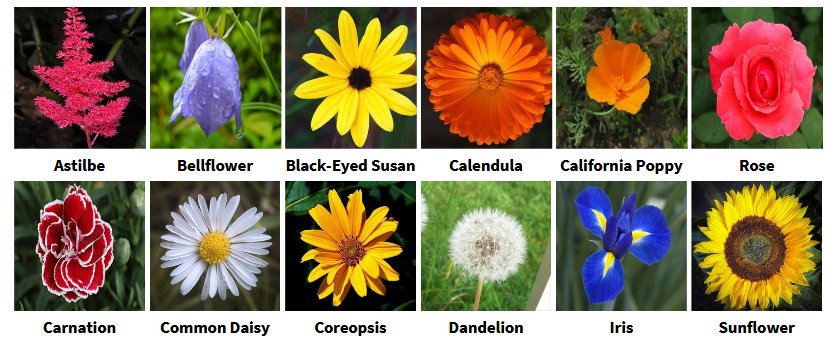
Para cada modelo a entrenar contabilice la cantidad de épocas, accuracy y tiempo promedio por época
(utilice la clase EpochTiming definida en el paquete tf_utils de la carpeta Fuentes como callback para el
entrenamiento). Utilice 250 épocas para los entrenamientos y agregue una parada temprana para evitar
overfitting.
### a) Entrene un modelo que utilice solamente capas Conv2D, MaxPooling2D, Flatten y Dense.
### b) Modifique la arquitectura anterior agregando capas de BatchNormalization luego las capas de MaxPooling2D y entrene un nuevo modelo.
### c) Compare las mediciones de los entrenamientos de los modelos de a) y b ¿Qué puede concluir? ¿Por qué?

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

seed = 42

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    'csv/Flowers',
    target_size=(96, 96),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=seed
)
validation_generator = datagen.flow_from_directory(
    'csv/Flowers',
    target_size=(96, 96),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=seed
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min',
                   patience=3, min_delta=1e-2,
                   restore_best_weights=True, verbose=1)

# Nota: cuando usás generators, el batch_size de fit se ignora; usa el del generator.
history = model.fit(train_generator,
                    epochs=250,
                    validation_data=validation_generator,
                    callbacks=[es])

val_loss, val_acc = model.evaluate(validation_generator)
print('Precisión validación:', val_acc)


Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.
Epoch 1/250


c:\Users\frank\OneDrive\Documentos\GitHub\4to-anio-unlp-sistemas\deeplearning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step - accuracy: 0.3143 - loss: 2.0166 - val_accuracy: 0.4285 - val_loss: 1.6660
Epoch 2/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.4273 - loss: 1.6721 - val_accuracy: 0.4626 - val_loss: 1.5877
Epoch 3/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.4777 - loss: 1.5489 - val_accuracy: 0.5259 - val_loss: 1.4069
Epoch 4/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.4959 - loss: 1.4684 - val_accuracy: 0.5419 - val_loss: 1.3595
Epoch 5/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.5228 - loss: 1.4042 - val_accuracy: 0.5712 - val_loss: 1.2918
Epoch 6/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.5291 - loss: 1.3612 - val_accuracy: 0.5546 - val_loss: 1.2926
Epoch 7/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.5446 - loss: 1.3216 - val_accuracy: 0.5973 - val_loss: 1.2041
Epoch 8/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.5620 - loss: 1.2905 - val_

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=250,
                    validation_data=validation_generator,
                    callbacks=[es])

val_loss, val_acc = model.evaluate(validation_generator)
print('Precisión validación con BatchNormalization:', val_acc)


Epoch 1/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 84s 211ms/step - accuracy: 0.2432 - loss: 2.6591 - val_accuracy: 0.2404 - val_loss: 2.7587
Epoch 2/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.3322 - loss: 1.9399 - val_accuracy: 0.3894 - val_loss: 1.8535
Epoch 3/250
394/394 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.3869 - loss: 1.7495 - val_accuracy: 0.3830 - val_loss: 1.9163
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.2464 - loss: 2.7826
Precisión validación con BatchNormalization: 0.24641834199428558


Aparentemente el BatchNormalization es mucho peor.
Segun GPT, el BatchNorm va despues de la capa de Convulución, no despues del MaxPooling.

# Ejercicio 6
Re-implemente el ejercicio 5 utilizando las capas convolucionales del modelo Mobilenet V3 (clase
MobileNetV3Small del paquete tensorflow.keras.applications) para extraer los patrones característicos y
agregue una o más capas densas para entrenar una nueva red que permita reconocer los 16 tipos de flores
del dataset “Flowers”. Recuerde que solo debe entrenar las capas densas.

In [61]:
# Reemplementación del ejercicio 5 con MobileNetV3Small

from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
    zoom_range=0.1, horizontal_flip=True,
    validation_split=0.2
)
seed = 42
IMG_SIZE = (224, 224)
BATCH = 32

train_gen = datagen.flow_from_directory(
    'csv/Flowers', target_size=IMG_SIZE, batch_size=BATCH,
    class_mode='categorical', subset='training', seed=seed, shuffle=True
)
val_gen = datagen.flow_from_directory(
    'csv/Flowers', target_size=IMG_SIZE, batch_size=BATCH,
    class_mode='categorical', subset='validation', seed=seed, shuffle=False
)
base = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=IMG_SIZE+(3,), pooling='avg')
base.trainable = False

model = Sequential([
    base,
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

es = EarlyStopping(monitor='val_loss', mode='min',
                   patience=10, min_delta=1e-3,
                   restore_best_weights=True, verbose=1)

model.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
# Fase 1: entrenar solo el head
model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[es])

# Fase 2: fine-tuning parcial
base.trainable = True
for layer in base.layers[:-30]:  # descongela ~últimas 30 capas
    layer.trainable = False

model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=100, callbacks=[es])

val_loss, val_acc = model.evaluate(val_gen)
print('Val acc (MobileNetV3, bien preprocesado y afinado):', val_acc)

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


c:\Users\frank\OneDrive\Documentos\GitHub\4to-anio-unlp-sistemas\deeplearning\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 62s 153ms/step - accuracy: 0.7467 - loss: 0.8124 - val_accuracy: 0.8574 - val_loss: 0.4344
Epoch 2/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 59s 151ms/step - accuracy: 0.8558 - loss: 0.4419 - val_accuracy: 0.8841 - val_loss: 0.3676
Epoch 3/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - accuracy: 0.8825 - loss: 0.3610 - val_accuracy: 0.8803 - val_loss: 0.3778
Epoch 4/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 60s 153ms/step - accuracy: 0.8952 - loss: 0.3217 - val_accuracy: 0.8918 - val_loss: 0.3332
Epoch 5/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.9057 - loss: 0.2865 - val_accuracy: 0.8953 - val_loss: 0.3165
Epoch 6/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.9169 - loss: 0.2585 - val_accuracy: 0.8981 - val_loss: 0.3025
Epoch 7/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.9182 - loss: 0.2499 - val_accuracy: 0.9067 - val_loss: 0.2919
Epoch 8/50
394/394 ━━━━━━━━━━━━━━━━━━━━ 63s 161ms/step - accuracy: 0.9185 - loss: 0

KeyboardInterrupt: 

# Ejercicio 7
Mozilla Common Voice es un proyecto (https://commonvoice.mozilla.org/es/datasets) que desarrolla una
base de datos de voces, abierta y multi idioma, que cualquiera puede usar para entrenar aplicaciones que
utilicen la voz como interfaz.
En particular cuenta con un pequeño corpus denominado Single Word que contiene las palabras habladas
SI, NO, Hey, Firefox y dígitos del cero al nueve.
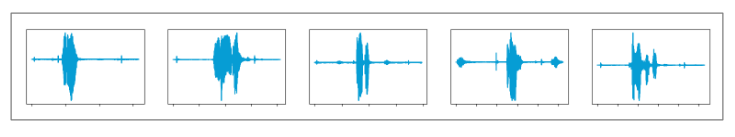
### a) Utilizando los ejemplos de una versión seleccionada de estos audios en el Moodle del curso, transformarlos en imágenes para que puedan ser procesados por la red siguiendo los siguientes criterios:

▪ Eliminar los silencios iniciales y finales. La comparación de los silencios en 2 audios produce
una falsa coincidencia.

▪ Elegir un tamaño fijo para los audios. Todas las imágenes deben tener el mismo tamaño. Como
las palabras del corpus son breves un tamaño de 0.75 segundos es razonable.

▪ Achicar/agrandar los audios manteniendo el tono de la voz

▪ Pasar el audio del dominio del tiempo al domino de la frecuencia. Dividir el audio en pequeños
intervalos y obtener un conjunto de valores que determinen las frecuencias presentes. Para
esto puede utilizarse la transformada de Fourier (FFT) o los coeficientes cepstrales en
frecuencia mel (MFCC) que aproximan la sensibilidad del oído humano.

▪ Finalmente convertir los coeficientes en una imagen con compresión sin pérdida como PNG.

### b) Utilizando las imágenes generadas en a), entrenar un modelo de red neuronal convolucional que permita reconocer las palabras del corpus Single Word.